<h1><center style="font-size: 48px">KiDS full sky masks</center></h1>
<br><br>

In [1]:
from astropy.io import fits
from astropy.wcs import WCS
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
from astropy import units as u
from astropy.coordinates import SkyCoord
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams.update({'figure.autolayout': True})

Populating the interactive namespace from numpy and matplotlib


## 1- Read KiDS flat mask

In [2]:
fileID='KiDS-N_KV450_footprint.fits'
hdulist = fits.open(fileID)
wcs_data = WCS(hdulist[0].header)
image_data = hdulist[0].data
wcs_data
ifilter=np.where(image_data==1)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


/Users/waerbeke/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


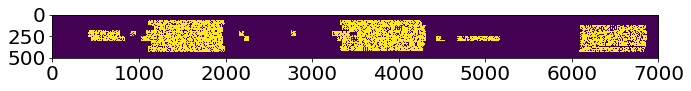

In [3]:
plt.imshow(image_data)

## 2- Convert pixels to RA,Dec

In [4]:
x,y=np.arange(1,hdulist[0].header['NAXIS1']+1),np.arange(1,hdulist[0].header['NAXIS2']+1)
xx, yy = np.meshgrid(x, y)
ra,dec=wcs_data.wcs_pix2world(xx[ifilter],yy[ifilter],1)
radec=np.stack((ra,dec)).T
theta = np.deg2rad(90.0 - radec[:, 1])
phi = np.deg2rad(radec[:, 0])

## 3- Create a "nside" healpix template map

In [5]:
nside=4096
nest=False
mask_hppix = hp.ang2pix(nside, theta=theta, phi=phi, nest=nest)
npix = hp.nside2npix(nside)
weights=None
countmap = np.bincount(mask_hppix, weights=weights, minlength=npix)

## 4- Save healpix mask map

/Users/waerbeke/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)
/Users/waerbeke/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


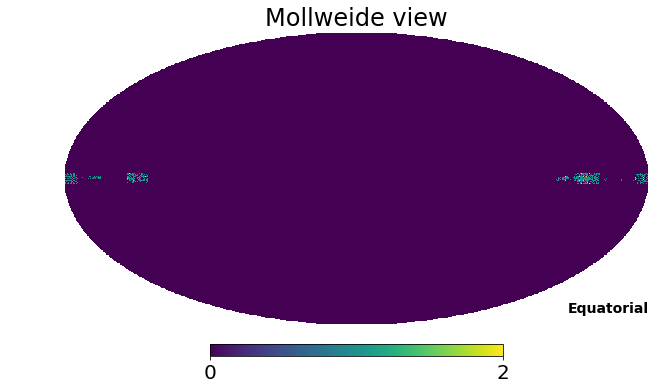

In [7]:
#hp.write_map('KiDSN_healpix.fits', countmap,coord='G')
hp.mollview(countmap,coord='C')